<a href="https://colab.research.google.com/github/estefaniabrito/SYS/blob/main/parcial_2___sys___jonathan_marcelo_g_o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial 2: Señales y Sistemas 2024-2

Profesor: Andrés Marino Álvarez Meza, Ph.D.
Departamento de Ingeniería Eléctrica, Electrónica, y Computación

Universidad Nacional de Colombia- sede Manizales

-

ESTUDIANTES: Jonathan Marcelo Giraldo Orozco- Estefania Ramirez Brito


## Punto 1

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t) = \left|A\cos\left(2\pi*Fo\right)\right|^2$, con $t\in [-1/2Fo, 1/2Fo]$. con A,Fo ∈ R+. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud
 y fase como diagrama de Bode en decibelios), y presente el error relativo y la señal reconstruida para N = {1,2,...,50}.



## Solución:

Se tiene que:

$$\boxed{{\omega_0} = 2{\pi}F_0}$$

$$x(t)=\left|A\cos\left(2{\pi}F_0t\right)\right|^2 = A^2\cos^2\left(2{\pi}F_0t\right) =  A^2\cos^2\left({\omega_0}t\right)$$

.

recordando que:

$\cos^2(\theta) = \frac{1}{2}\left(1 + cos(2\theta)\right)$

entonces:

$$\boxed{x(t)= \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)}$$

Ahora para la serie trigonométrica:

$$\boxed{x(t)= a_0 + \sum_{n=1}^{N=50}{a_n\cos(n\omega_0 t) + b_n\sin(n\omega_0 t)}},$$

donde:

$$\boxed{a_0 = c_0 = \frac{1}{t_f-t_i}\int_{t_i}^{t_f}x(t)dt}$$

$$\boxed{a_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\cos(n\omega_0 t)dt}$$

$$\boxed{b_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\sin(n\omega_0 t)dt}$$
.

$T = {t_f-t_i} = \frac{1}{2F_0} - (-\frac{1}{2F_0}) = \frac{2}{2F_0}  $

$$\boxed{T = \frac{1}{F_0}}$$


##Simulamos la señal de entrada con ${F_0} = 10 (Hz)$ ,   $ A = 5$

$$\boxed{x_0(t)= \left(\frac{5^2}{2}\right)\left(1 + \cos\left(2{\pi}(10)t\right)\right)}$$



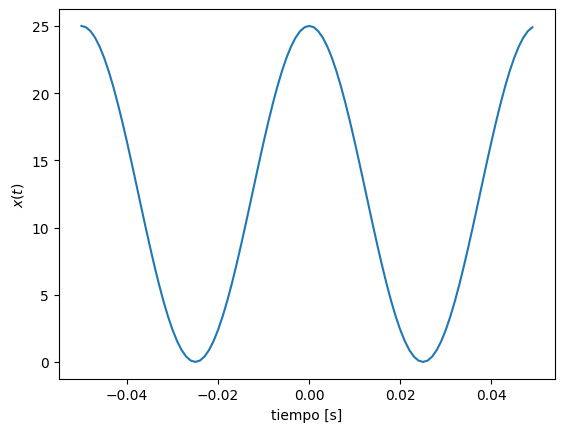

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 5                                 # A ** 2 = Amplitud
Fo = 10                               #Frecuencia fundamental (Hz)
ti = -1/(2*Fo)                        #Tiempo inicial
tf = 1/(2*Fo)                         #Tiempo final
T = tf-ti                             #Periodo
wo = 2*np.pi*Fo                       #Frecuencia angular
Fs = 100*Fo                      #Frecuencia muestreo estrictamente mayor a 2*Fo
tv = np.arange(ti,tf,1/Fs)            #Vector de tiempo
Nm = len(tv)                          #Muestras en el tiempo
xo = ((A**2)/2)*(1 + np.cos(2*wo*tv)) #señal de entrada
plt.plot(tv,xo)                       #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

##Dado que $x(t)$ presenta simetría par, $x(t)=x(-t)$:


 $$\boxed{b_n = 0 \quad \forall n \in \{1,\dots,50\}}$$

Así:

$$\boxed{x(t)= \left(\frac{A^2}{2} + \frac{A^2}{2}\cos\left(2{\omega_0}t\right)\right) =  a_0 + \sum_{n=1}^{N=50}{a_n\cos(n\omega_0 t)}}$$

.

##Calculamos $a_0$ que es quien condiciona el nivel DC de la señal.

$$a_0 = \frac{1}{\frac{1}{F_0}}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}} \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)dt$$

.

$$ a_0= \frac{A^2F_0}{2}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}(1+cos(2{\omega_0}t))dt = \frac{A^2F_0}{2}\left(t\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}+\frac{sin(2{\omega_0}t)}{2{\omega_0}}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)$$

.

$$ a_0= \frac{A^2F_0}{2}\left(\frac{1}{2F_0}-\left(-\frac{1}{2F_0}\right)\right)+\frac{A^2F_0}{4{\omega_0}}\left(sin(2*2{\pi}F_0\left(\frac{1}{2F_0}\right))-sin(2*2{\pi}F_0\left(-\frac{1}{2F_0}\right))\right)$$

.

Simplificando la expresón, obtenemos:

$$a_0 =  \frac{A^2F_0}{2F_0} +  \frac{A^2F_0}{2}\left(2sin(2{\pi}\right)) $$

gracias a que la función seno es impar ($f(x)= -f(-x)$) obtuvimos $2sin(2{\pi})$, sin embargo, $sin(2{\pi}) = 0$, por lo tanto :

$$\boxed{a_0= \frac{A^2}{2}}$$

##por otra parte, está $a_n$ :

$$a_n = \frac{2}{\frac{1}{F_0}}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}} \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)(cos(n{\omega_0}t))dt$$

.

$$a_n = \frac{2}{\frac{1}{F_0}}\left(\frac{A^2}{2}\right)\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}cos(n{\omega_0}t)dt + \int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\left(\cos\left(2{\omega_0}t\right)\right)(cos(n{\omega_0}t))dt$$

recordando la identidad:

$cos(\alpha)*cos(\beta) = \frac{cos(\alpha+\beta)+cos(\alpha-\beta)}{2}$

.

$$a_n = \left(\frac{A^2F_0}{1}\right)\left(\left(\frac{sin(n2{\pi}F_0t)}{n2{\pi}F_0}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)+\left(\frac{sin(\left(n+2)(2{\pi}F_0t\right))}{2\left(n+2)(2{\pi}F_0\right)}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)+\left(\frac{sin(\left(n-2)(2{\pi}F_0t\right))}{2\left(n-2)(2{\pi}F_0\right)}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)\right)$$

.

después de evaluar y simplificar, obtenemos lo siguiente:

$$a_n = \left(\frac{A^2}{2{\pi}}\right)\left(\frac{2sin(n{\pi})}{n}+\frac{sin(\left(n+2){\pi}\right)}{(n+2)}+\frac{sin(\left(n-2){\pi}\right)}{(n-2)}\right)$$

.

Para $n\neq 0$ , $n\neq -2$y $n\neq 2$ , $a_n = 0.$ No obstante, para $n = 0$, $n = -2$ y $n = 2$ debemos calcular el límite y aproximar la indeterminación $\frac{0}{0}$:


$$a_0 = \frac{A^2}{2{\pi}}\lim_{n\to 0}\frac{\tfrac{d}{dn}\left[\sin(n\pi)\right]}{\tfrac{d}{dn}\left[n\right]} = \frac{A^2}{2{\pi}}\lim_{n\to 0}\frac{\cos(n\pi)(\pi)}{1}$$


$$\boxed{a_0= \frac{A^2}{2{\pi}}\left(\pi\right)= \frac{A^2}{2}}$$

.

$$a_2 = \frac{A^2}{2{\pi}}\lim_{n\to 2}\frac{\tfrac{d}{dn}\left[\sin((n-2)\pi)\right]}{\tfrac{d}{dn}\left[n-2\right]} = \frac{A^2}{2{\pi}}\lim_{n\to 2}\frac{\cos((n-2)\pi)(\pi)}{1} $$

$$a_2= \frac{A^2}{2{\pi}}(1)\left(\pi\right)= \frac{A^2}{2}$$

$$\boxed{a_2= \frac{A^2}{2}}$$

.

$$a_{-2} = \frac{A^2}{2{\pi}}\lim_{n\to -2}\frac{\tfrac{d}{dn}\left[\sin((n+2)\pi)\right]}{\tfrac{d}{dn}\left[n+2\right]} = \frac{A^2}{2{\pi}}\lim_{n\to- 2}\frac{\cos((n+2)\pi)(\pi)}{1} $$

$$a_2= \frac{A^2}{2{\pi}}(1)\left(\pi\right)= \frac{A^2}{2}$$

$$\boxed{a_{-2}= \frac{A^2}{2}}$$

por lo tanto:

$$\boxed{a_n = \left\{\begin{align} 0 & \quad \forall n \setminus \{-2,2\}\\
\frac{A^2}{2} & \quad n =  \{-2,2\}\\
\end{align}\right.}$$

$$\boxed{x(t) = a_0+\sum_{n=1}^{N}{a_n \sin(nt)} = a_0+b_2\cos(2{\omega_0t})=\frac{A^2}{2}+\frac{A^2}{2}\cos(2{\omega_0t})}$$

Para el caso de la serie exponencial compleja:

$$c_0 = a_0 = \frac{A^2}{2}$$

y

$$c_n = \frac{a_n - j b_n}{2}$$

Entonces:
$$\boxed{c_n = \left\{\begin{align}
\frac{A^2}{4} & \quad n = \{-2,2\}\\
\frac{A^2}{2} & \quad n = 0\\
0 & \quad \forall n \setminus \{-2,0,2\}
\end{align}\right.}$$

y

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n t}}}$$


$$x(t) = c_{-2}e^{-j2t} + c_{0}e^{0} + c_{2}e^{j2t}$$

$$x(t)= \frac{A^2}{4}(\cos(2{\omega_0t})-j\sin(2{\omega_0t}))+\frac{A^2}{2}+\frac{A^2}{4}(\cos(2{\omega_0t})+j\sin(2{\omega_0t})) $$

Se cancela la función seno y nos queda:

$$\boxed{x(t) = \frac{2A^2}{4}\cos(2{\omega_0t})+\frac{A^2}{2}=\frac{A^2}{2}+\frac{A^2}{2}\cos(2{\omega_0t})}$$

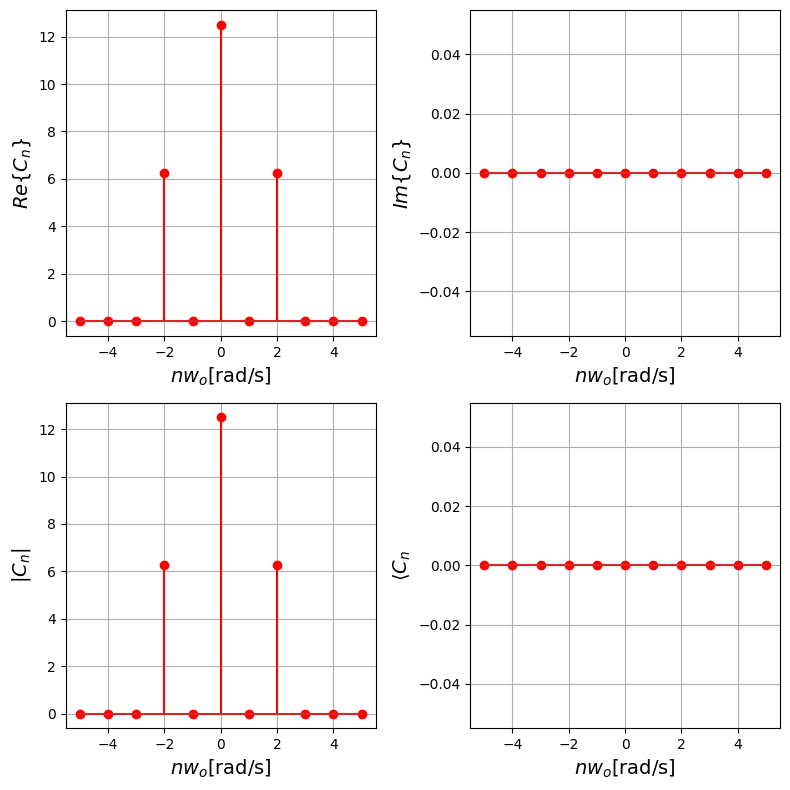

In [ ]:
#Se presenta la simulación del espectro y la reconstrucción

#Construir bases serie exponencial
N = 5 #Número de armónicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#espectro de la señal - serie exponencial
#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn[N] = (A**2)/2 # nivel dc C_0
Cn[N-2] = (A**2)/4 # nivel armónico
Cn[N+2] = (A**2)/4

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Para calcular el error relativo, necesitamos la potencia:


$$e_r[\%] = \frac{\bar{P}_e}{\bar{P_x}} *100[\%] = \left(1-\frac{\sum^N_{n=-N}|c_n|^2P_n}{\bar{P}_x}\right)*100[\%]$$

En este caso, la potencia de $x(t)$ se cálcula como:

\begin{equation}
P_x = \frac{1}{\frac{1}{F_0}}\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}{|x(t)^2|dt} = \frac{1}{\frac{1}{F_0}}\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}{|\frac{A^2}{2}+\frac{A^2}{2}j\cos(2{\omega_0t})|^2dt}= \frac{A^2F_0}{4}\left(\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}dt + \int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}2*\cos(2{\omega_0t})dt + \int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}\cos^2(2{\omega_0t})dt\right)
\end{equation}

Resolviendo la ecuación:

$$\boxed{P_x= \frac{3A^4}{8}}$$

Para el caso de la serie exponencial de Fourier $P_n=1$, entonces:

\begin{equation}
E_r[\%] = 1 - \left(\frac{1}{P_x}\sum\limits_{n=-N}^N{|c_n|^2}\right)
\end{equation}

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


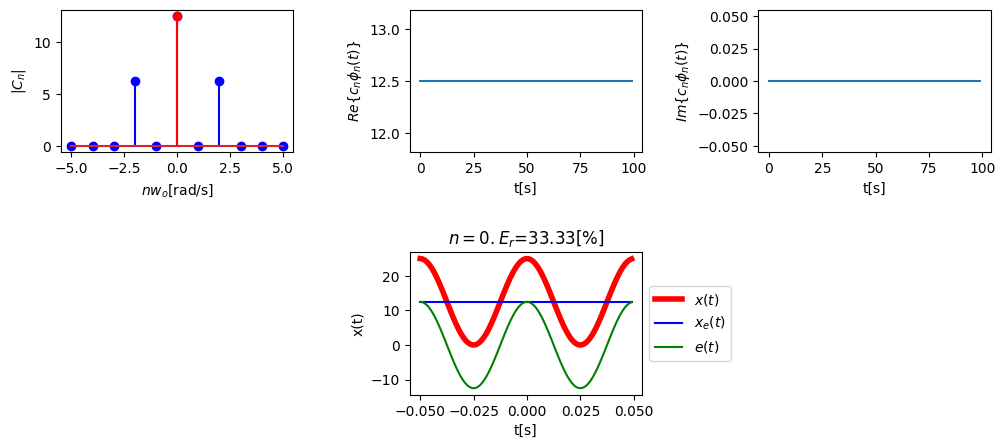

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = (3*A**4)/(8)
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$n=%d. E_r$=%.2f[%%]' % (n,100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

    #desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

anim

# Punto 2

Sea la señal portadora $c(t) = A_c\sin(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$.  Luego, descargue desde youtube 5 segundos de su canción
 favorita (capturando del segundo 20 al 25). Presente una simulación de modulacoón por amplitud AM (tomando como mensaje el
 fragmento de la canción escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora
 y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y se˜ nal modulada. Nota: se sugiere utilizar un canal de
 señal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el índice de modulación deseado.

 ## Solución:

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathscr{F}\{y(t)\} = \mathscr{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathscr{F}\{c(t)\}+\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier), el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{j2}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz #se intala la librería que nos ayudará a realizar lo planteado.

     / 2.7 MB 14.6 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2928467 sha256=23643b2a243238091811ead7e689f91be5ea5dcdde8cb29257864cb7316760d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-2til2j_a/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [ ]:
!pip install yt-dlp

In [ ]:
!yt-dlp --cookies-from-browser brave -f best "https://www.youtube.com/watch?v=bpOSxM0rNPM"

         To let yt-dlp download and merge the best available formats, simply do not pass any format selection.
         If you know what you are doing and want only the best pre-merged format, use "-f b" instead to suppress this warning
Extracting cookies from brave
ERROR: could not find brave cookies database in "/root/.config/BraveSoftware/Brave-Browser"


In [ ]:
link="https://www.youtube.com/watch?v=bpOSxM0rNPM"

!yt-dlp --extract-audio  --audio-format mp3 -o "audio.%(ext)s" {link}

SyntaxError: invalid syntax (<ipython-input-27-b15b3513442d>, line 2)

In [ ]:
!ffmpeg  -i audio.mp3 output.wav #convertimos el audio del link en wav para manipularlo mas fácil.

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!pip install soundfile

In [ ]:
!apt-get update
!apt-get install ffmpeg -y
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para leer el archivo wav
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

LibsndfileError: Error opening 'output.wav': System error.

In [ ]:
xpro= x.copy () #copiar archivos para procesar
ti=25 #tiempo inicial en el que tomaremos la medida
tf=30 #tiempo final de la medida
ts=tf-ti #segundos de la medida
m=xpro[int(ti*fs):int(tf*fs),0] #señal mensaje en el primer canal

In [ ]:
#reproducir el fragmento original, es decir la señal mensaje
Audio(m,rate=fs)

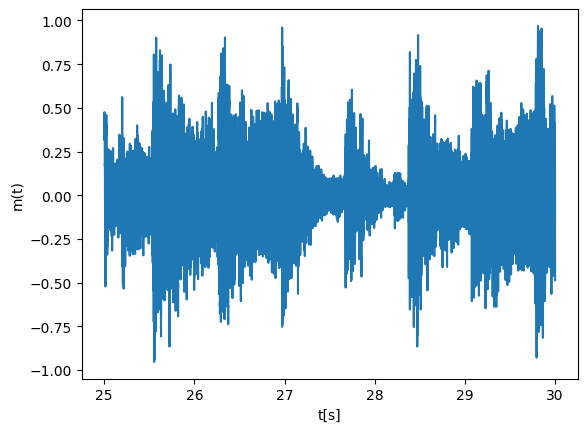

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
tt= np.arange(ti,tf,1/fs) #vector de tiempo
plt.plot(tt,m) #nos grafica la señal mensaje en el tiempo
plt.xlabel('t[s]')
plt.ylabel('m(t)')
plt.show()


In [ ]:
Fc = 15000 #frecuencia de portadora
t = np.arange(0,ts,1/fs) #vector del tiempo
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)

0.96893310546875


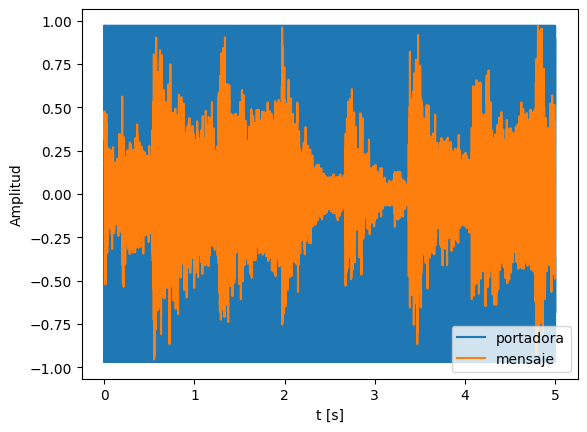

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [ ]:
Audio(c,rate=fs) #reproducir portadora

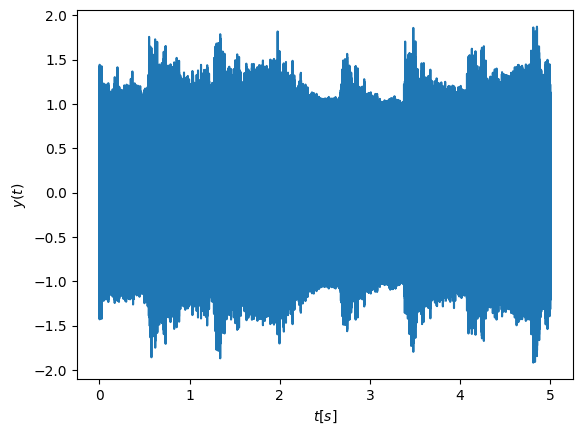

In [ ]:
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

In [ ]:
Audio(y,rate=fs) #reproducir modulada

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir frecuencia de muestreo (fs)
fs = 1000  # Ajusta esto según tu caso

# Asegurar que los datos sean 1D
c = np.asarray(c).ravel()
x = np.asarray(x).ravel()
y = np.asarray(y).ravel()

# Cálculo de FFT
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(x)
Xfy = np.fft.fft(y)

# Frecuencia de muestreo
vfre_c = np.fft.fftfreq(len(c), 1/fs)
vfre_x = np.fft.fftfreq(len(x), 1/fs)  # Frecuencias para x
vfre_y = np.fft.fftfreq(len(y), 1/fs)  # Frecuencias para y


# Asegurar que las dimensiones coincidan
# The original code used 'vfre' which was not defined.
# Replacing it with 'vfre_y' as it is used for plotting Xfy
if len(vfre_y) != len(Xfy):
    vfre_y = vfre_y[:len(Xfy)]

# Graficar espectros
plt.plot(vfre_y, abs(Xfy), label='modulada')
plt.plot(vfre_x, abs(Xfm), label='mensaje')
plt.plot(vfre_c, abs(Xfc), label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.show()

NameError: name 'c' is not defined

#Punto 3
Consulte en qué consiste la distorsión total de armónicos (*Total Harmonic Distortion*-(THD) y el factor de potencia en un circuito eléctrico. Cómo puede calcularse el THD desde la FFt? Genere un ejemplo ilustrativo para el cálculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i)netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El usuario podrá escoger diferentes valores de R y C. Discuta los valores obtenidos.

#Solución:

El objetivo de realizar un ejemplo ilustrativo para el cálculo del **THD (Total Harmonic Distortion o Distorsión Armónica Total)** y la **distorsión del factor de potencia** para un rectificador de onda completa con carga es comprender cómo estas características afectan la calidad y eficiencia de los sistemas de conversión de energía. Esto es especialmente importante en aplicaciones de electrónica de potencia, donde los rectificadores son comúnmente utilizados para convertir corriente alterna (AC) en corriente continua (DC).

**Distorción armónica total (THD):**

El **THD** es una medida de la distorsión en una señal debido a la presencia de armónicos, los cuales son múltiplos de la frecuencia fundamental. Cuanto mayor sea el THD, más alejada está la señal de salida de una forma de onda ideal, lo que afecta el rendimiento de los equipos conectados.

En los sistemas de rectificación, la presencia de armónicos es común debido a la no linealidad del proceso de rectificación. Esta simulación permite al usuario ver cómo los diferentes valores de los componentes (resistencias y capacitancias) afectan el contenido armónico de la señal rectificada y, en consecuencia, el THD.
""")

**Distorción del factor de potencia (*DFP*):**

El **factor de potencia** mide cuán eficiente es el uso de la energía eléctrica en un sistema. Se calcula como la relación entre la potencia activa y la potencia aparente. La **distorsión del factor de potencia** indica cómo los armónicos impactan en la eficiencia de la transmisión de energía.

En cargas puramente resistivas, se espera que el factor de potencia esté más cerca de 1, lo que indica una conversión eficiente de la potencia. Sin embargo, en cargas inductivas o capacitivas, la distorsión del factor de potencia puede aumentar, lo que indica que hay más energía reactiva en el sistema que no contribuye a la potencia útil.

Se calcula mediante:

$\text{THD (\%)} = \frac{\sqrt{P_2 + P_3 + P_4 + \cdots}}{P_1} \times 100 = \frac{\sqrt{V_2^2 + V_3^2 + \dots + V_n^2}}{V_1} \times 100$

Donde $P_1$ es la potencia de la frecuencia fundamental, y $P_2,P_3,...,P_n$ es la potencia para el armónico $n$ de la fundamental, y cada $V_i$ corresponde a la amplitud respectiva del armónico.

Como se puede observar, cuando tenemos un circuito RC, vemos como la señal de salida muestra como el factor de potencia altera la señal de salida si la comparamos con una entrada puramente resistiva

X(s)/(C*R*s + 1)
Seleccione (1) o (2)
(1): Circuito RC serie
(2): Circuito R puro
Ingrese su opción: 1
Ingrese el valor de R (Ω): 1200000
Ingrese el valor de C (F): 0.00000009
La respuesta del circuito RC es: X(s)/(0.108*s + 1)
Ingrese la amplitud de la señal: 120
Ingrese la frecuencia de la señal de alimentación (Hz): 60


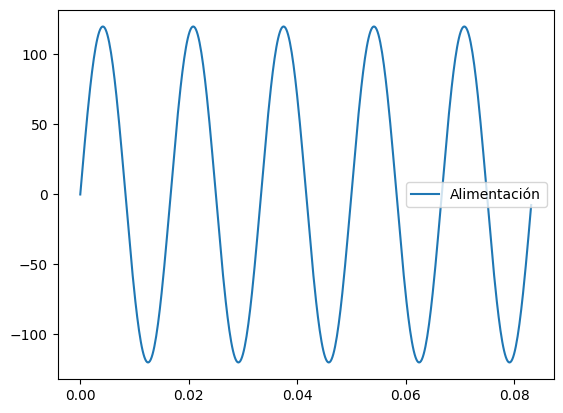

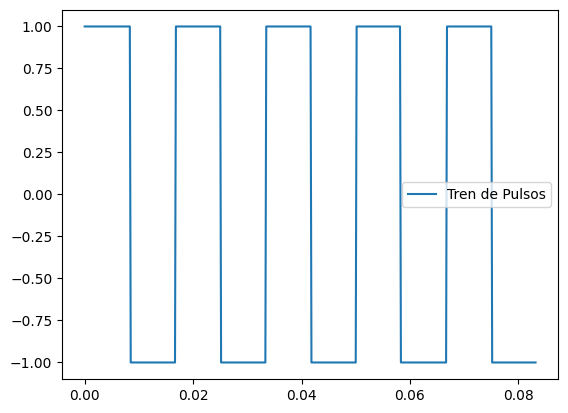

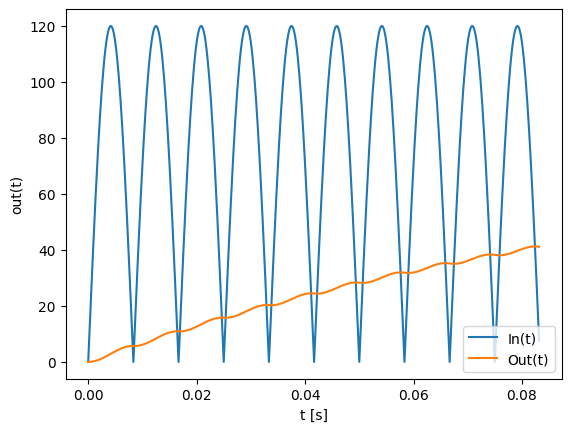

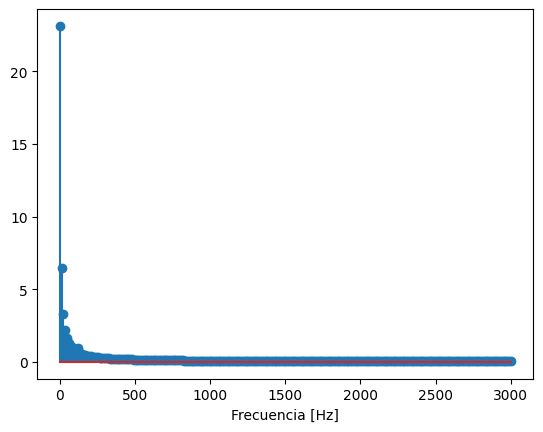

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.optimize as opt
import sympy as sym

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X

#Realizamos el código para pedir al usuario el tipo de circuito que desea ademas de la amplitud, la frecuencia y valores que desea tener
while True:
    print("Seleccione (1) o (2)")
    print("(1): Circuito RC serie")
    print("(2): Circuito R puro")
    circuito = int(input("Ingrese su opción: "))

    if circuito == 1:
        R_v = float(input("Ingrese el valor de R (Ω): "))
        C_v = float(input("Ingrese el valor de C (F): "))
        Y_RC = Y.subs(R, R_v).subs(C, C_v)
        print(f"La respuesta del circuito RC es: {Y_RC}")
        break
    elif circuito == 2:
        R_v = float(input("Ingrese el valor de R (Ω): "))
        C_v = 0
        Y_R = Y.subs(R, R_v).subs(C,C_v)
        print(f"La respuesta del circuito R puro es: {Y_R}")
        break
    else:
        print("Opción no válida. Intente nuevamente.")

# Aquí pedimos los valores de amplitud y frecuencia
A = float(input("Ingrese la amplitud de la señal: "))
Fo = float(input("Ingrese la frecuencia de la señal de alimentación (Hz): "))

# Calculamos la frecuencia de muestreo, periodo y tiempo de muestreo
Fs = 100 * Fo  # frecuencia de muestreo (Hz)
To = 1 / Fo  # periodo fundamental (s)
Ts = 1 / Fs  # periodo muestreo (s)

# Creamos el vector de tiempo
t = np.arange(0, 5 * To, Ts)  # se simulan 5 períodos de alimentación

# Función de entrada aproximada como onda cosenoidal rectificada completa
in_o = A * (np.sin(2 * np.pi * Fo * t))

# Función tren de pulsos para simular señal rectificada
rec_c = sig.square(2 * np.pi * Fo * t)

# Señal de entrada rectificada
in_ = in_o * rec_c

# Evaluar salida ante entrada rectificada mediante aproximación numérica de scipy
num = np.array([1])  # coeficientes del numerador de la función de transferencia como numpy array
den = np.array([R_v * C_v, 1])  # coeficientes del denominador de la función de transferencia
G_n = sig.TransferFunction(num, den)  # función de transferencia
out = G_n.output(in_, T=t)[1]

# Graficamos las señales
plt.plot(t, in_o, label='Alimentación')
plt.legend()
plt.show()

plt.plot(t, rec_c, label='Tren de Pulsos')
plt.legend()
plt.show()

plt.plot(t, in_, label='In(t)')  # entrada rectificada
plt.plot(t, out, label='Out(t)') # salida del circuito
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

# Cálculo del espectro con fft
vfre = np.fft.rfftfreq(len(out), 1 / Fs)  # vector de frecuencia en Hz según tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.stem(vfre, abs(Xf / len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('')
plt.show()


#Discusión o conclusiones:


*   Se observa como a medida que variamos los valores de R y C el THD no variará. Una resistencia alta o una capacitancia baja tienden a aumentar la distorción armónica.
*   Un THD alto lleva a un factor de potencia mas bajo indicando una menor eficiencia. En conclusión ajustar los valores de R y C nos permiten mejorar la eficiencia minimizando distorciones.

#Punto 4

Desarrolle un sistema para identificar una palabra clave y autenticar al hablante utilizando herramientas basadas en la Transformada de Fourier. El sistema debe presentarse como un Dashboard en Streamlit y cumplir con las siguientes condiciones: i) Permitir el acceso únicamente si un miembro del grupo pronuncia la palabra clave. ii) Denegar el acceso en cualquier otro caso.
Además, se debe presentar y describir el esquema de solución que incluya: i) Diseño del sistema de detección. ii) La base de datos creada para almacenar los patrones de voz y palabras clave. iii) Las consideraciones técnicas para implementar la solución, incluyendo el uso de la Transformada de Fourier para procesar las señales de voz.

In [ ]:

#cargar datos desde drive acceso libre
FILEIDCLAVE = "1Pe3NYKymDlFqSPw21kbkx68ryo5OqTSe"



# Usar wget para descargar los archivos
!wget --load-cookies /tmp/cookies.txt \
    "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEIDCLAVE -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILEIDCLAVE" -O "clave.mp3" && rm -rf /tmp/cookies.txt




--2025-02-01 23:20:39--  https://docs.google.com/uc?export=download&confirm=&id=1Pe3NYKymDlFqSPw21kbkx68ryo5OqTSe
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.113, 74.125.142.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Pe3NYKymDlFqSPw21kbkx68ryo5OqTSe&export=download [following]
--2025-02-01 23:20:39--  https://drive.usercontent.google.com/download?id=1Pe3NYKymDlFqSPw21kbkx68ryo5OqTSe&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5851938 (5.6M) [audio/wav]
Saving to: ‘clave.mp3’

clave.mp3           100%[===================>]   5.58M  --.-KB/s    in 0.02s  

In [ ]:
import librosa
import numpy as np
import soundfile as sf

# Cargar el audio con librosa
audio_path = "clave.mp3"
y, sr = librosa.load(audio_path, sr=None)

# Detectar los segmentos de audio (sin silencios)
segments = librosa.effects.split(y, top_db=20)  # top_db ajusta el umbral de silencio

# Mostrar los segmentos detectados
print("Segmentos detectados:", segments)

# Encontrar el segmento más corto
min_duration = float('inf')
min_segment = None
for start, end in segments:
    duration = (end - start) / sr  # Duración en segundos
    if duration < min_duration:
        min_duration = duration
        min_segment = (start, end)

# Mostrar el segmento más corto
print(f"Segmento más corto: {min_segment} con duración: {min_duration} segundos")

# Recortar el audio a ese segmento
y_trimmed = y[min_segment[0]:min_segment[1]]

# Guardar el audio recortado
sf.write("audio_recortado.wav", y_trimmed, sr)
print("Audio recortado guardado como 'audio_recortado.wav'")


<ipython-input-1-c1faac3e7551>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'clave.mp3'